# Calibration
- Read in calibration data file with recorded counts, measured distance in inches, and "known" distance in inches

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
file_path = os.path.join('Data', 'Calibration_LukeEdwards.csv')
df_cal = pd.read_csv(file_path)
df_cal.head()

,Output Distance,Counts,Actual Distance
0,200.0,400,200
1,200.0,400,200
2,200.5,401,200
3,199.5,399,200
4,199.0,398,200


### Perform linear regression to get slope and offset

In [3]:
x = np.array(df_cal.loc[:, 'Counts']).reshape((-1, 1))
y = np.array(df_cal.loc[:, 'Actual Distance']).reshape((-1, 1))
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_[0]}")
print(f"coefficient of determination: {r_sq}")

intercept: [-0.58245255]
slope: [0.50249919]
coefficient of determination: 0.9998889307521073


### Calculate before/after calibration RMSE
- Factory cal ("before") is counts * 0.5
- Our cal uses slope and intercept from above

In [4]:
# Factory cal
before = df_cal.loc[:, 'Counts']*0.5+0

# Our cal
after = df_cal.loc[:, 'Counts']*model.coef_[0]+model.intercept_

# Manually measured "actual" distance
actual = df_cal.loc[:, 'Actual Distance']

# RMSEs
rmse_before = np.sqrt(np.sum((before-actual)**2)/(len(before)))
rmse_after = np.sqrt(np.sum((after-actual)**2)/(len(before)))

print(rmse_before, rmse_after)

0.8108848540793832 0.7042701707073725


### Plot

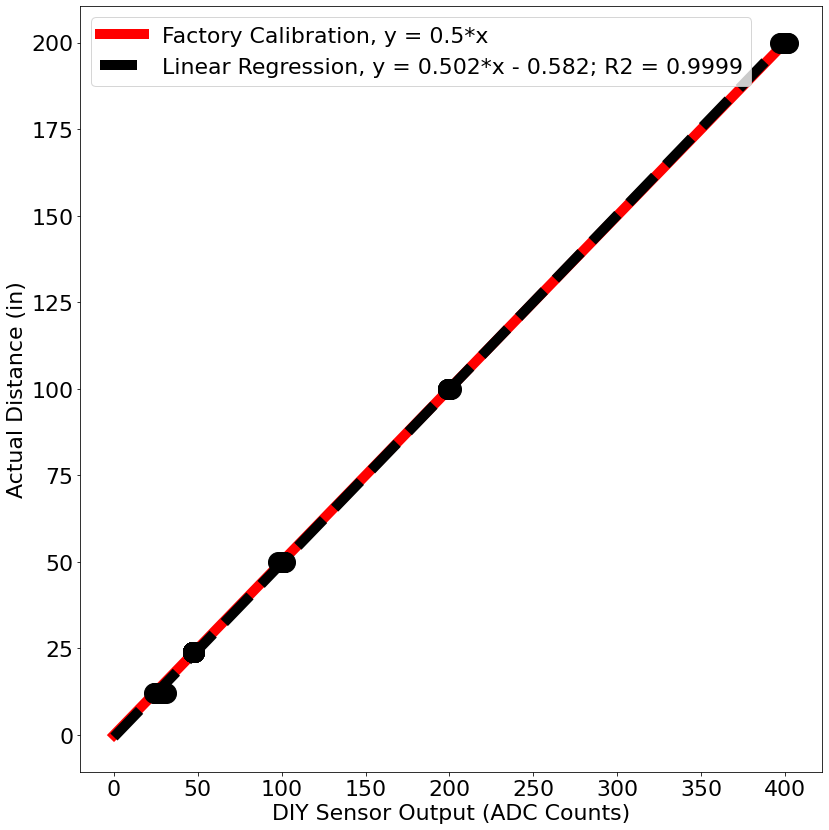

In [6]:
# Create figure
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(figsize=(12, 12))

# Generate line of best fit from linreg above
x_fake = np.linspace(0, 400, 401)
y_linreg = x_fake*model.coef_+model.intercept_
y_lr = y_linreg[0, :]

# Show factory cal (0.5 slope, no offset)
y_factory = x_fake*0.5

# Plot factory cal
plt.plot(x_fake, y_factory, 'r-', linewidth = 10, label = 'Factory Calibration, y = 0.5*x')

# Plot recal
plt.plot(x_fake, y_lr, 'k--', linewidth = 10, label = 'Linear Regression, y = 0.502*x - 0.582; R2 = 0.9999')

plt.plot(df_cal.loc[:, 'Counts'], df_cal.loc[:, 'Actual Distance'], 'ko', markersize=20)

axs.legend(loc="upper left")
axs.set_xlabel('DIY Sensor Output (ADC Counts)')
axs.set_ylabel('Actual Distance (in)')

plt.tight_layout()

fig_path = os.path.join('Figures', 'Calibration.png')
plt.savefig(fig_path, dpi = 300)